<a href="https://colab.research.google.com/github/trabajogrado28/Tesis/blob/main/Antes_de_K_medias_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ruta = '/content/drive/MyDrive/fetal2020.csv'
data = pd.read_csv(ruta, encoding='latin1')

/tmp/ipython-input-3-2069962887.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(ruta, encoding='latin1')


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.patches import Ellipse
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import OneHotEncoder,  StandardScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from google.colab import drive
from itertools import product
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Import necessary functions
import umap
from scipy.stats import entropy
datos_fetal2020 = data
datos_fetal2020.head(6)

,ï»¿,cod_dpto,cod_munic,a_defun,sit_defun,otrsitiode,tipo_defun,ano,mes,hora,...,c_muerteb,c_muertec,c_muerted,c_muertee,asis_med,causa_mult,c_bas1,causa_667,idprofcer,cau_homol
0,0,70,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
1,1,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
2,2,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
3,3,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
4,4,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P964/P019,P964,406,1,86
5,5,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,1.0,NaN,NaN,1,P018,P018,402,1,80


In [5]:
print(datos_fetal2020.columns)


Index(['ï»¿', 'cod_dpto', 'cod_munic', 'a_defun', 'sit_defun', 'otrsitiode',
       'tipo_defun', 'ano', 'mes', 'hora', 'minutos', 'sexo', 'codpres',
       'codptore', 'codmunre', 'area_res', 'seg_social', 'idadmisalud',
       'p_pman_iris', 'cons_exp', 'mu_parto', 't_parto', 'tipo_emb', 't_ges',
       'peso_nac', 'edad_madre', 'n_hijosv', 'n_hijosm', 'est_civm',
       'niv_edum', 'ultcurmad', 'codocur', 'codmunoc', 'c_muerte', 'c_muerteb',
       'c_muertec', 'c_muerted', 'c_muertee', 'asis_med', 'causa_mult',
       'c_bas1', 'causa_667', 'idprofcer', 'cau_homol'],
      dtype='object')


In [6]:
datos_fetal2020.columns = datos_fetal2020.columns.str.strip()


In [7]:
datos_fetal2020.columns = datos_fetal2020.columns.str.lower()


In [8]:
datos_importantes = datos_fetal2020[['cod_dpto', 'seg_social', 'niv_edum', 'edad_madre']]

In [9]:
datos_rangos = datos_importantes[(datos_importantes["seg_social"] < 9) & (datos_importantes["niv_edum"] < 99) & (datos_importantes["edad_madre"] < 99)]
datos_rangos.head(4)

,cod_dpto,seg_social,niv_edum,edad_madre
0,70,2,4,3.0
1,11,1,4,5.0
2,11,5,9,5.0
3,11,5,5,3.0


In [10]:
datos_importantes.seg_social.isnull()

,seg_social
0,False
1,False
2,False
3,False
4,False
...,...
33322,False
33323,False
33324,False
33325,False


In [11]:
datos_importantes.edad_madre.isnull()

,edad_madre
0,False
1,False
2,False
3,False
4,False
...,...
33322,False
33323,False
33324,False
33325,False


In [12]:
# Filtra para conservar solo las filas que cumplan con las condiciones (seg_social < 9, niv_edum < 99, edad_madre < 99)
datos_filtros = datos_importantes[(datos_importantes["seg_social"] < 9) &
                                  (datos_importantes["niv_edum"] < 99) &
                                  (datos_importantes["edad_madre"] < 99) ]

# Reemplaza el DataFrame original con los datos filtrados
datos_importantes = datos_filtros

In [13]:
print(datos_filtros)

       cod_dpto  seg_social  niv_edum  edad_madre
0            70           2         4         3.0
1            11           1         4         5.0
2            11           5         9         5.0
3            11           5         5         3.0
4            11           5         4         2.0
...         ...         ...       ...         ...
33322        41           2         2         5.0
33323        11           2         2         2.0
33324        11           5         4         3.0
33325        76           1         3         5.0
33326        11           5         4         5.0

[30758 rows x 4 columns]


In [14]:
from sklearn.preprocessing import OneHotEncoder

# Aplicar One-Hot Encoding a todas las variables categóricas
encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(datos_filtros)

In [15]:
print(data_encoded)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [16]:
# Convertir a DataFrame con los nombres de las columnas
columnas_categoricas = encoder.get_feature_names_out(datos_filtros.columns)
datos_finales = pd.DataFrame(data_encoded, columns=columnas_categoricas)

# Mostrar las primeras filas para verificar
print(datos_finales.head())

   cod_dpto_5  cod_dpto_8  cod_dpto_11  cod_dpto_13  cod_dpto_15  cod_dpto_17  \
0         0.0         0.0          0.0          0.0          0.0          0.0   
1         0.0         0.0          1.0          0.0          0.0          0.0   
2         0.0         0.0          1.0          0.0          0.0          0.0   
3         0.0         0.0          1.0          0.0          0.0          0.0   
4         0.0         0.0          1.0          0.0          0.0          0.0   

   cod_dpto_18  cod_dpto_19  cod_dpto_20  cod_dpto_23  ...  niv_edum_13  \
0          0.0          0.0          0.0          0.0  ...          0.0   
1          0.0          0.0          0.0          0.0  ...          0.0   
2          0.0          0.0          0.0          0.0  ...          0.0   
3          0.0          0.0          0.0          0.0  ...          0.0   
4          0.0          0.0          0.0          0.0  ...          0.0   

   edad_madre_1.0  edad_madre_2.0  edad_madre_3.0  edad_madre_

In [17]:
# Normalizar los datos codificados entre 0 y 1 antes de K-medias
scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(datos_finales)

K-MEDIAS

In [18]:
from sklearn.cluster import KMeans

# Aplicar K-Medias sobre datos normalizados (antes de RBM)
kmeans_preRBM = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans_preRBM.fit(datos_normalizados)  # Aquí trabajamos con datos_normalizados

# Asignar los clústeres al DataFrame original de variables importantes
datos_importantes["Cluster_preRBM"] = kmeans_preRBM.labels_

# Ver las primeras filas con los clusters asignados
print(datos_importantes.head())




   cod_dpto  seg_social  niv_edum  edad_madre  Cluster_preRBM
0        70           2         4         3.0               1
1        11           1         4         5.0               3
2        11           5         9         5.0               0
3        11           5         5         3.0               3
4        11           5         4         2.0               3


=== Estadísticas descriptivas por clúster (antes de RBM) ===
                 cod_dpto  seg_social  niv_edum  edad_madre
Cluster_preRBM                                             
0               33.915083    1.229721  6.838946    4.549600
1               37.873720    2.000000  4.000000    3.810747
2               40.532309    2.555884  3.637396    3.770450
3               29.050784    2.069007  4.002689    4.045258


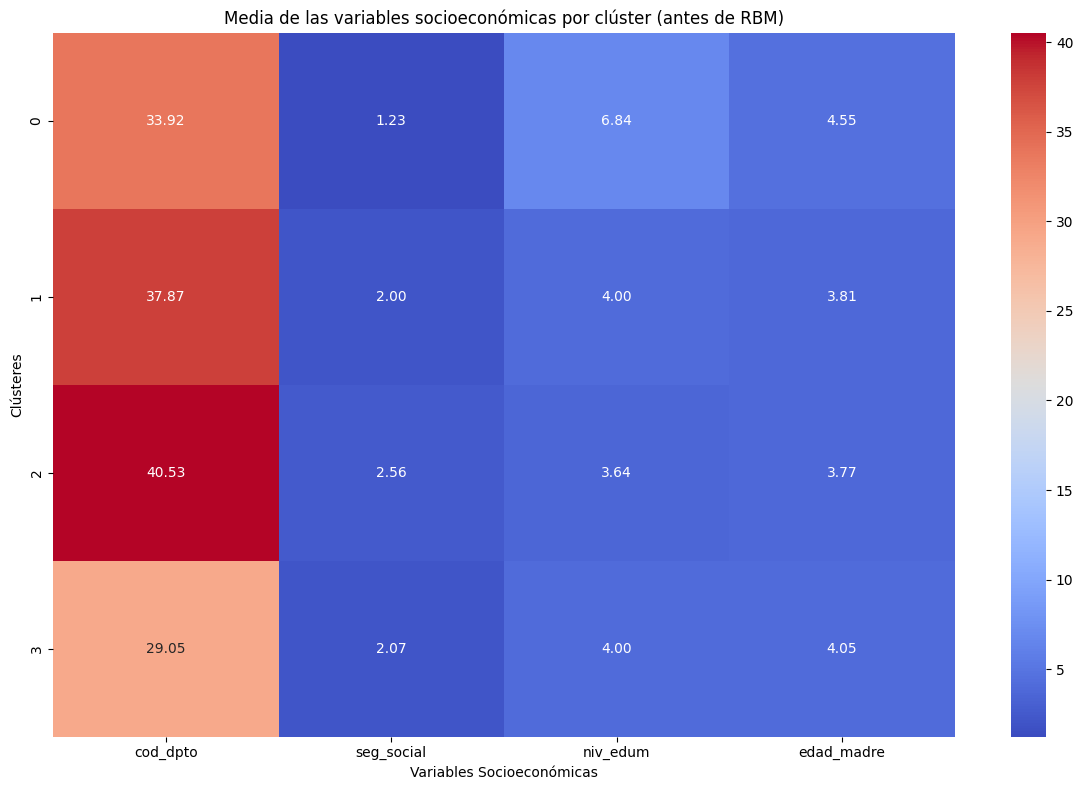

In [19]:
# Agrupar por el clúster obtenido antes de RBM y calcular estadísticas
estadisticas_cluster_preRBM = datos_importantes.groupby("Cluster_preRBM").mean()

print("=== Estadísticas descriptivas por clúster (antes de RBM) ===")
print(estadisticas_cluster_preRBM)

# Visualizar las estadísticas con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(estadisticas_cluster_preRBM, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Media de las variables socioeconómicas por clúster (antes de RBM)")
plt.xlabel("Variables Socioeconómicas")
plt.ylabel("Clústeres")
plt.tight_layout()
plt.show()


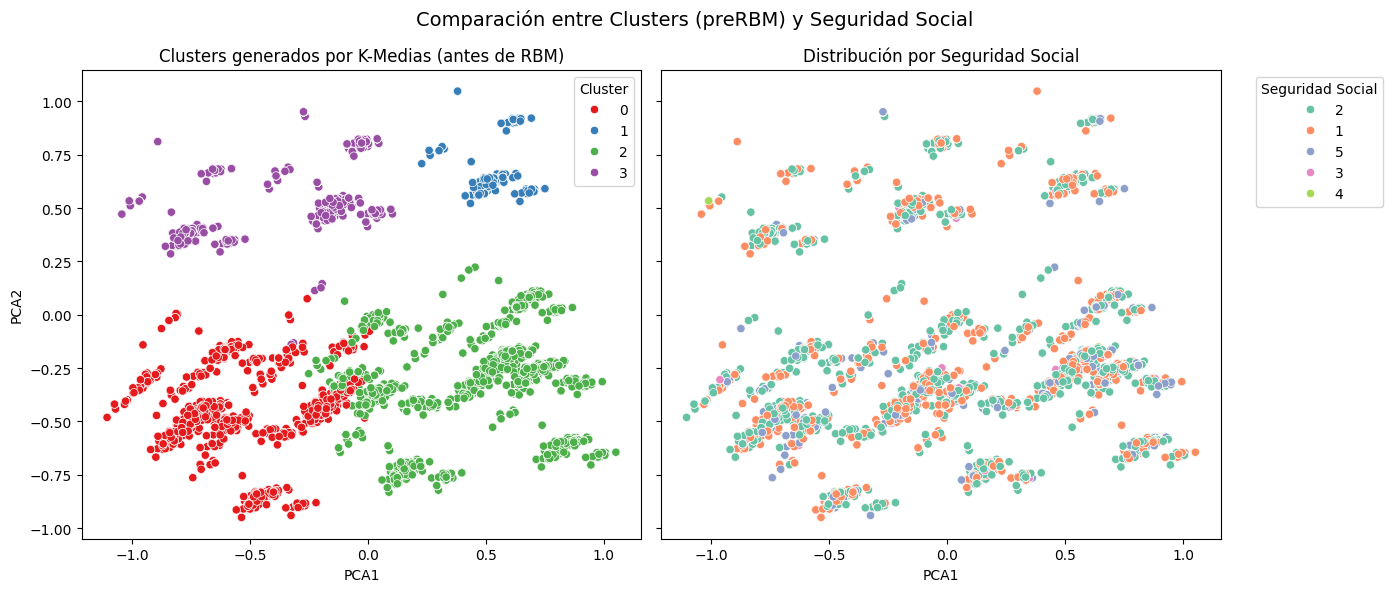

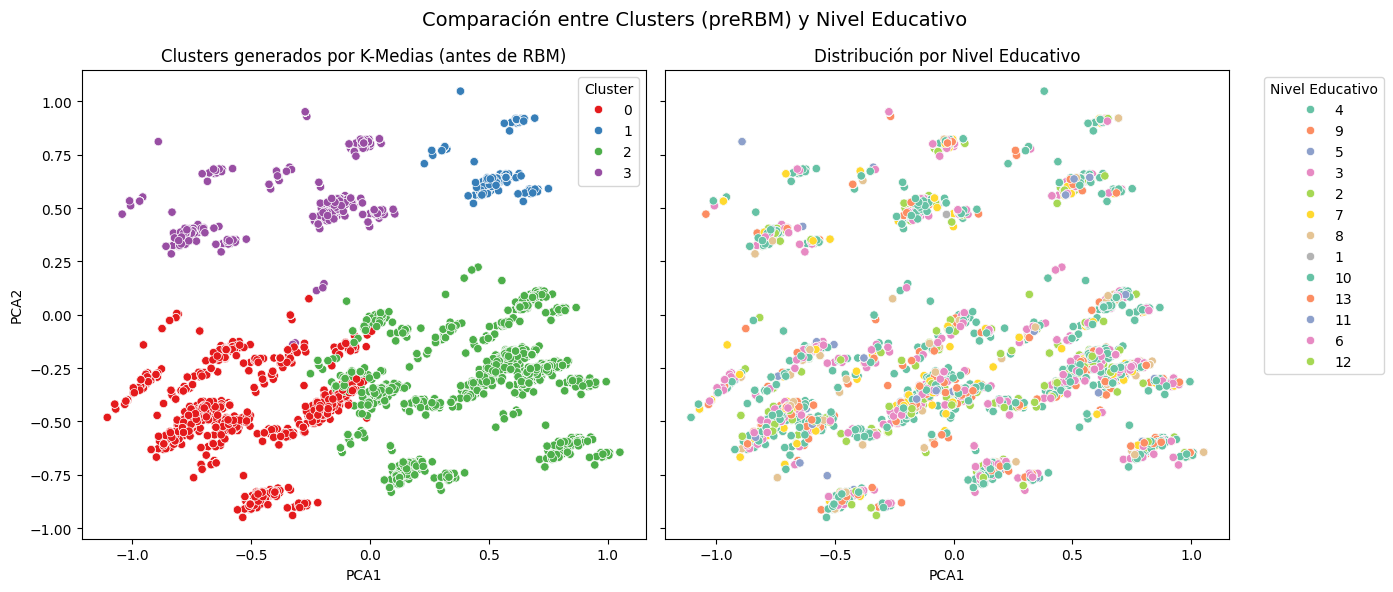

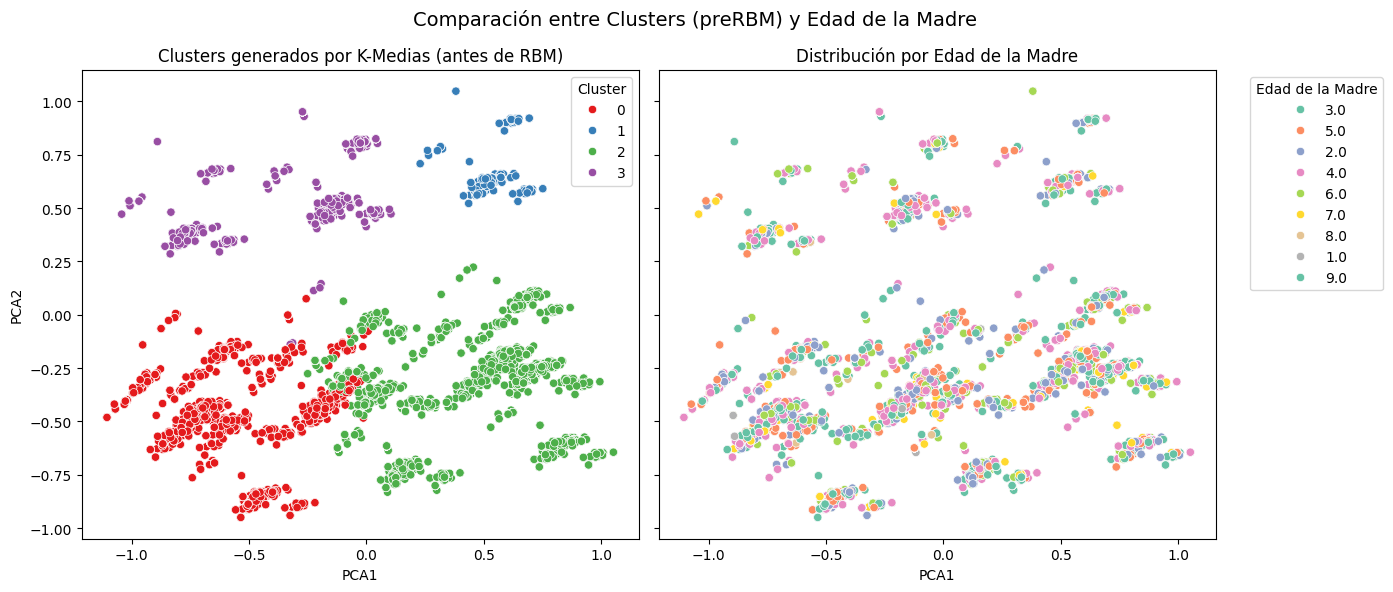

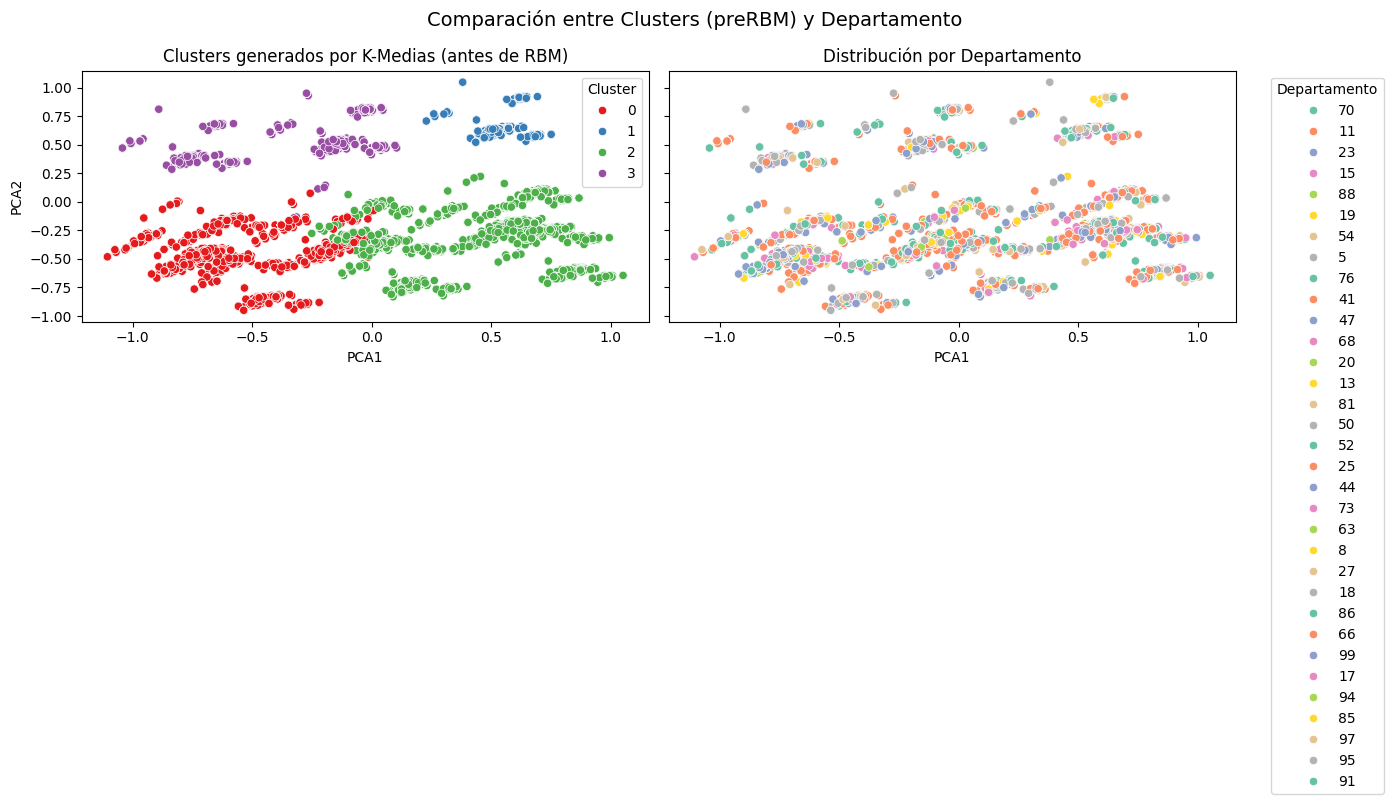

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aplicar PCA a los datos normalizados (antes de RBM)
pca_preRBM = PCA(n_components=2)
datos_pca_preRBM = pca_preRBM.fit_transform(datos_normalizados)

# Crear un DataFrame base para graficar
df_base_preRBM = pd.DataFrame(datos_pca_preRBM, columns=["PCA1", "PCA2"])
df_base_preRBM["Cluster_preRBM"] = kmeans_preRBM.labels_

# Lista de variables originales para comparar
variables_originales = {
    "seg_social": "Seguridad Social",
    "niv_edum": "Nivel Educativo",
    "edad_madre": "Edad de la Madre",
    "cod_dpto": "Departamento"
}

# Crear una figura por cada variable comparando los clústeres con las variables originales
for var, nombre in variables_originales.items():
    df_base_preRBM["Referencia"] = datos_importantes[var].astype(str)  # Convertir a string para categorías

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

    # Scatterplot de los clusters generados por K-Medias
    sns.scatterplot(data=df_base_preRBM, x="PCA1", y="PCA2", hue="Cluster_preRBM", palette="Set1", ax=axes[0])
    axes[0].set_title("Clusters generados por K-Medias (antes de RBM)")
    axes[0].legend(title="Cluster")

    # Scatterplot de la distribución por la variable original
    sns.scatterplot(data=df_base_preRBM, x="PCA1", y="PCA2", hue="Referencia", palette="Set2", ax=axes[1])
    axes[1].set_title(f"Distribución por {nombre}")
    axes[1].legend(title=nombre, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.suptitle(f"Comparación entre Clusters (preRBM) y {nombre}", fontsize=14)
    plt.tight_layout()
    plt.show()


In [21]:
from scipy.stats import entropy

# Función para calcular entropía por clúster
def calcular_entropia_por_cluster(df, cluster_col, variable_col):
    entropias = {}

    for cluster_id in sorted(df[cluster_col].unique()):
        grupo = df[df[cluster_col] == cluster_id][variable_col]
        conteo = grupo.value_counts(normalize=True)
        ent = entropy(conteo, base=2)
        entropias[cluster_id] = ent

    return entropias

# Variables que quieres evaluar
variables = ['cod_dpto', 'edad_madre', 'niv_edum', 'seg_social']

# Calcular y mostrar entropías (antes de RBM)
for var in variables:
    entropias_preRBM = calcular_entropia_por_cluster(datos_importantes, 'Cluster_preRBM', var)
    print(f"\nEntropía por clúster respecto a '{var}' (antes de RBM):")
    for cluster, ent in entropias_preRBM.items():
        print(f"  Clúster {cluster}: Entropía = {ent:.4f} bits")



Entropía por clúster respecto a 'cod_dpto' (antes de RBM):
  Clúster 0: Entropía = 3.5244 bits
  Clúster 1: Entropía = 4.1108 bits
  Clúster 2: Entropía = 4.3868 bits
  Clúster 3: Entropía = 3.2295 bits

Entropía por clúster respecto a 'edad_madre' (antes de RBM):
  Clúster 0: Entropía = 2.5133 bits
  Clúster 1: Entropía = 2.3891 bits
  Clúster 2: Entropía = 2.5888 bits
  Clúster 3: Entropía = 2.4275 bits

Entropía por clúster respecto a 'niv_edum' (antes de RBM):
  Clúster 0: Entropía = 2.4691 bits
  Clúster 1: Entropía = 0.0000 bits
  Clúster 2: Entropía = 1.9304 bits
  Clúster 3: Entropía = 0.0220 bits

Entropía por clúster respecto a 'seg_social' (antes de RBM):
  Clúster 0: Entropía = 0.4624 bits
  Clúster 1: Entropía = 0.0000 bits
  Clúster 2: Entropía = 0.7497 bits
  Clúster 3: Entropía = 0.9746 bits


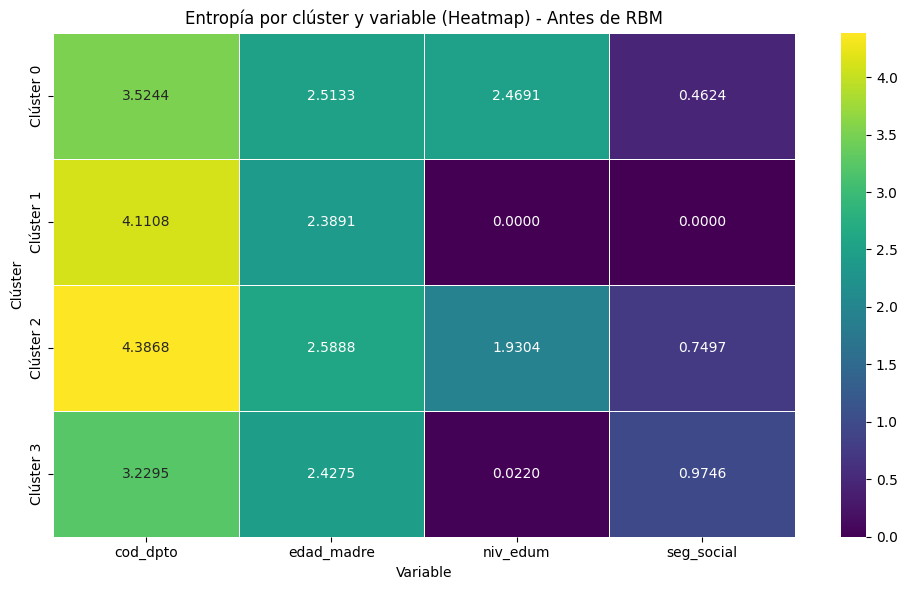

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear DataFrame de entropía basada en tus resultados antes de la RBM
df_entropia_preRBM = pd.DataFrame({
    'cod_dpto': [3.5244, 4.1108, 4.3868, 3.2295],
    'edad_madre': [2.5133, 2.3891, 2.5888, 2.4275],
    'niv_edum': [2.4691,  0.0000,  1.9304, 0.0220],
    'seg_social': [0.4624,0.0000, 0.7497,  0.9746]
}, index=['Clúster 0', 'Clúster 1', 'Clúster 2', 'Clúster 3'])

# Generar Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_entropia_preRBM, annot=True, cmap="viridis", fmt=".4f", linewidths=0.5)
plt.title("Entropía por clúster y variable (Heatmap) - Antes de RBM")
plt.xlabel("Variable")
plt.ylabel("Clúster")
plt.tight_layout()
plt.show()



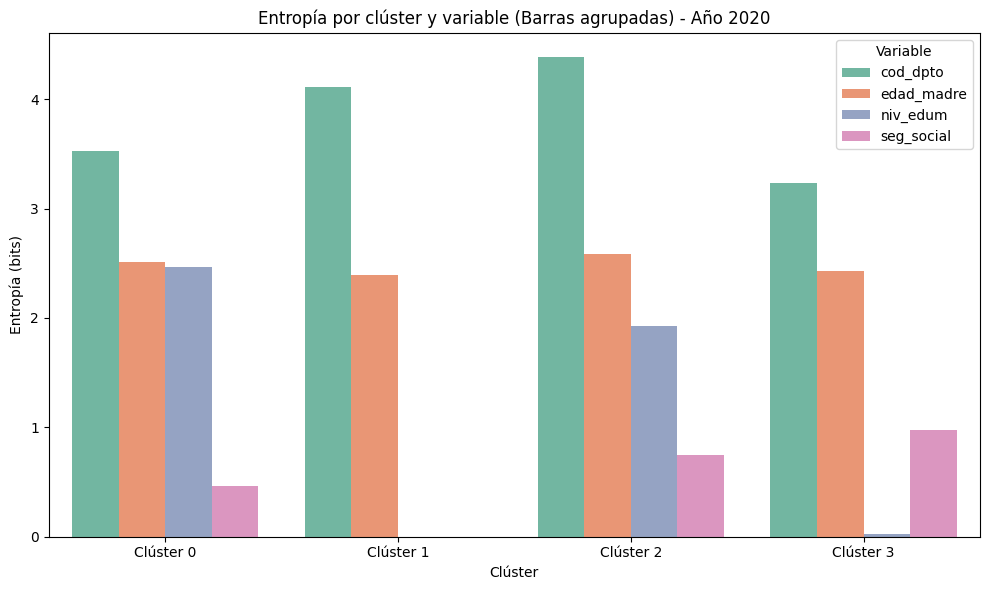

In [23]:
# Reorganizar los datos para el gráfico de barras
df_entropia_bar_2020 = df_entropia_preRBM.reset_index().melt(id_vars="index", var_name="Variable", value_name="Entropía") # Change df_entropia_2020 to df_entropia_preRBM
df_entropia_bar_2020.rename(columns={"index": "Clúster"}, inplace=True)

# Gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(data=df_entropia_bar_2020, x="Clúster", y="Entropía", hue="Variable", palette="Set2")
plt.title("Entropía por clúster y variable (Barras agrupadas) - Año 2020")
plt.ylabel("Entropía (bits)")
plt.xlabel("Clúster")
plt.legend(title="Variable")
plt.tight_layout()
plt.show()

RBM


In [24]:
# Configuración de la Máquina de Boltzmann Restringida (RBM)
rbm = BernoulliRBM(n_components=10, learning_rate=0.01, n_iter=100, random_state=42)

# Entrenar la RBM
datos_rbm = rbm.fit_transform(datos_normalizados)

# Convertir a DataFrame para visualización
datos_rbm_df = pd.DataFrame(datos_rbm)

# Mostrar las primeras filas de las características aprendidas por la RBM
print("Representaciones aprendidas por la RBM:")
print(datos_rbm_df.head())

Representaciones aprendidas por la RBM:
          0         1         2         3         4         5         6  \
0  0.050589  0.993042  0.000273  0.000653  0.999910  0.999922  0.891045   
1  0.001550  0.999194  0.999298  0.999818  0.999920  0.000160  0.005129   
2  0.002357  0.986859  0.999952  0.999609  0.992370  0.999589  0.000004   
3  0.020769  0.843205  0.999975  0.000232  0.003450  0.999976  0.013183   
4  0.990529  0.412500  0.999156  0.996726  0.999936  0.997619  0.000014   

          7         8         9  
0  0.000382  0.997648  0.999880  
1  0.993660  0.979810  0.999423  
2  0.997922  0.947139  0.000017  
3  0.997822  0.993814  0.005542  
4  0.997856  0.243472  0.999995  


In [25]:
# Calcular la reconstrucción manualmente
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

# Propagar hacia la capa oculta
activaciones_ocultas = sigmoide(np.dot(data_encoded, rbm.components_.T) + rbm.intercept_hidden_)

# Reconstruir la entrada desde la capa oculta
X_reconstruido = sigmoide(np.dot(activaciones_ocultas, rbm.components_) + rbm.intercept_visible_)

# Calcular el error de reconstrucción
error_reconstruccion = np.mean((data_encoded - X_reconstruido) ** 2)
print(f"Error de reconstrucción de la RBM: {error_reconstruccion}")

Error de reconstrucción de la RBM: 0.0156663118801355


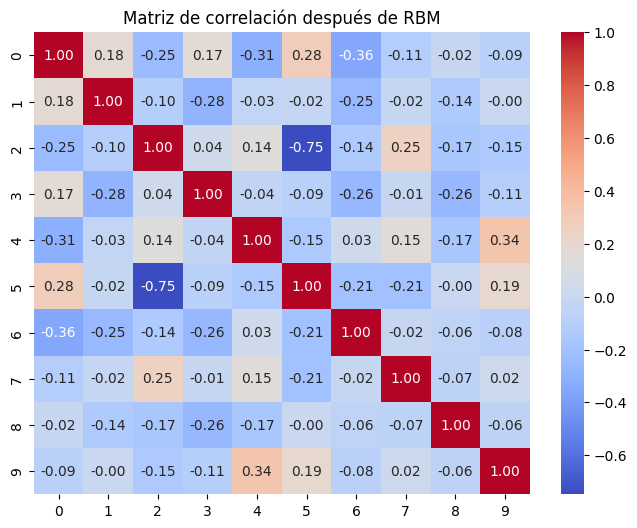

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación de las variables después de la RBM
correlation_matrix = pd.DataFrame(datos_rbm).corr()

# Graficamos la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación después de RBM")
plt.show()